In [1]:
# import libraries
from PIL import Image
from torchvision import models, transforms
import torch
import streamlit as st
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
def image_loader(loader, image):
    
    image = loader(image).float()
    image = torch.tensor(image, requires_grad=True)
    image = image.unsqueeze(0)
    return image

data_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])


def use_model(image):
    model_ft = torch.load('land_use_model.pth', map_location=torch.device('cpu'))
    model_ft.eval()
    out = model_ft(image_loader(data_transforms, image)).detach().numpy()
    out = torch.from_numpy(out)
    classes=['AnnualCrop','Forest','HerbaceousVegetation','Highway','Industrial','Pasture','PermanentCrop','Residential','River','SeaLake']
    # return the top 5 predictions ranked by highest probabilities
    prob = torch.nn.functional.softmax(out, dim = 1)[0] * 100
    _, indices = torch.sort(out, descending = True)
    return [(classes[idx], prob[idx].item()) for idx in indices[0][:5]]



classes=['AnnualCrop','Forest','HerbaceousVegetation','Highway','Industrial','Pasture','PermanentCrop','Residential','River','SeaLake']

temp_dic ={}
for cs in classes:
    temp_dic[cs]=0


path_data = os.getcwd()
path_data = os.path.join(path_data, 'report_me')


image_files = os.listdir(path_data)
for file_up in image_files:
    
    image = Image.open(os.path.join (path_data,file_up))
    
    labels = use_model(image)
    print("###############################################")
    print("File name: ", file_up)
    temp_dic[labels[0][0]]+=1
    for i in labels:
        print("Prediction    ->", i[0], ", Score: ", i[1])
        
    print("_______________________________________________")

###############################################
File name:  AnnualCrop_13.jpg
Prediction    -> AnnualCrop , Score:  99.65312194824219
Prediction    -> PermanentCrop , Score:  0.2804388403892517
Prediction    -> River , Score:  0.03425987437367439
Prediction    -> Highway , Score:  0.03163386136293411
Prediction    -> Pasture , Score:  0.0004940335638821125
_______________________________________________
###############################################
File name:  AnnualCrop_14.jpg
Prediction    -> AnnualCrop , Score:  99.98490905761719
Prediction    -> SeaLake , Score:  0.013001570478081703
Prediction    -> River , Score:  0.0016397411236539483
Prediction    -> Pasture , Score:  0.0002705491497181356
Prediction    -> PermanentCrop , Score:  0.00011901286052307114
_______________________________________________
###############################################
File name:  AnnualCrop_15.jpg
Prediction    -> AnnualCrop , Score:  98.14369201660156
Prediction    -> Highway , Score:  1.55495631

###############################################
File name:  Industrial_16.jpg
Prediction    -> Industrial , Score:  95.90357208251953
Prediction    -> PermanentCrop , Score:  3.1336638927459717
Prediction    -> Residential , Score:  0.5669107437133789
Prediction    -> Highway , Score:  0.285788357257843
Prediction    -> Pasture , Score:  0.08166618645191193
_______________________________________________
###############################################
File name:  Industrial_2.jpg
Prediction    -> Industrial , Score:  99.99494934082031
Prediction    -> Highway , Score:  0.004635986872017384
Prediction    -> PermanentCrop , Score:  0.00019131354929413646
Prediction    -> River , Score:  0.00013049734116066247
Prediction    -> Residential , Score:  8.894487837096676e-05
_______________________________________________
###############################################
File name:  Industrial_3.jpg
Prediction    -> Industrial , Score:  98.2901840209961
Prediction    -> PermanentCrop , Score:  0

###############################################
File name:  River_49.jpg
Prediction    -> River , Score:  89.08740234375
Prediction    -> AnnualCrop , Score:  8.455694198608398
Prediction    -> SeaLake , Score:  1.1676985025405884
Prediction    -> Pasture , Score:  0.6027707457542419
Prediction    -> PermanentCrop , Score:  0.30678030848503113
_______________________________________________
###############################################
File name:  River_50.jpg
Prediction    -> River , Score:  99.5142822265625
Prediction    -> Highway , Score:  0.4098310172557831
Prediction    -> AnnualCrop , Score:  0.02958526648581028
Prediction    -> Pasture , Score:  0.02870049513876438
Prediction    -> SeaLake , Score:  0.01513768918812275
_______________________________________________
###############################################
File name:  SeaLake_13.jpg
Prediction    -> SeaLake , Score:  99.85124206542969
Prediction    -> River , Score:  0.10406409949064255
Prediction    -> Forest , Score:

In [6]:
import pandas as pd
df = pd.DataFrame(list(temp_dic.items()))

Total Images =  48


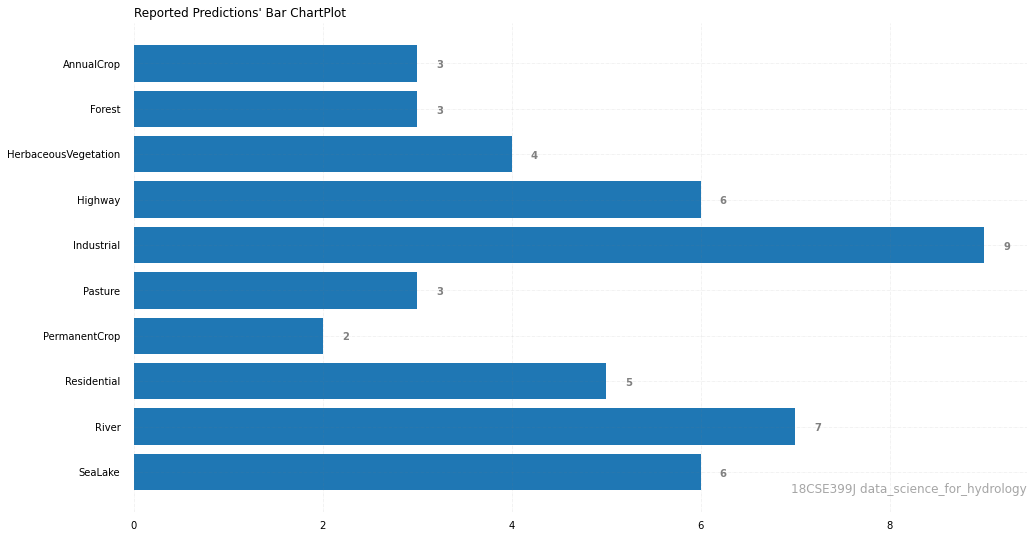

In [13]:
from matplotlib import pyplot as plt
 
# Read CSV into pandas

 
name = df[0]
counts = df[1]
print("Total Images = ",sum(counts))
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, counts)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Reported Predictions\' Bar ChartPlot',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, '18CSE399J data_science_for_hydrology', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()